<a href="https://colab.research.google.com/github/RafarelG/An-lisis-de-Datos-con-Python-/blob/main/Filtrado_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Depuración de Datos Solares**

**Antes de ser Procesado 📑**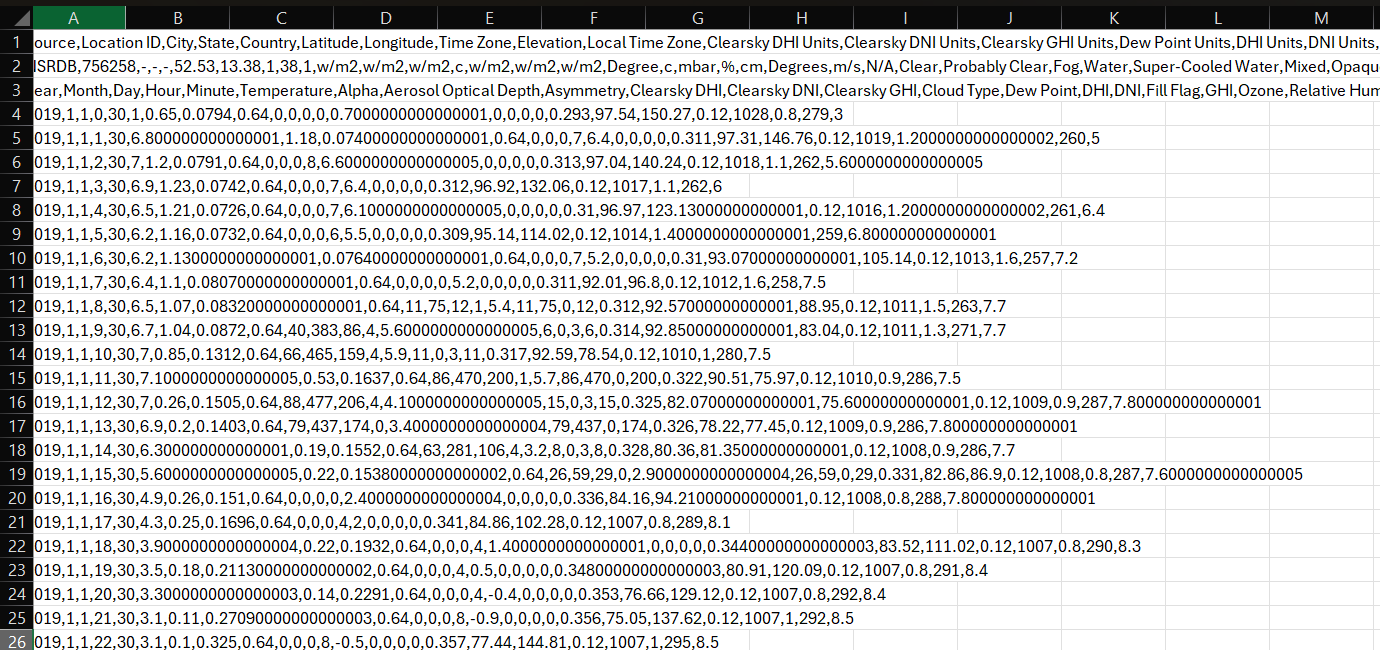

In [ ]:
import pandas as pd
import numpy as np

def limpiar_datos_nsrdb(nombre_archivo='Berlin_sinordern.csv'):

    print("🔄 Iniciando limpieza de datos NSRDB...")

    try:
        # Leer el archivo completo
        print(f"📂 Leyendo archivo: {nombre_archivo}")
        with open(nombre_archivo, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        print(f"📊 Total de líneas encontradas: {len(lines)}")

        # Buscar la línea que contiene los headers de las columnas
        header_line = None
        data_start_line = None

        for i, line in enumerate(lines):
            if 'Year,Month,Day,Hour,Minute' in line:
                header_line = line.strip()
                data_start_line = i + 1
                break

        if header_line is None:
            raise ValueError("No se encontró la línea de headers con 'Year,Month,Day,Hour,Minute'")

        print(f"✅ Headers encontrados en línea {data_start_line}")

        # Separar los headers
        headers = header_line.split(',')
        print(f"📋 Columnas encontradas: {len(headers)}")

        # Definir las columnas que queremos extraer
        columnas_deseadas = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'GHI', 'DNI']

        # Encontrar los índices de las columnas deseadas
        indices_columnas = {}
        for col in columnas_deseadas:
            try:
                indices_columnas[col] = headers.index(col)
                print(f"✅ {col}: índice {indices_columnas[col]}")
            except ValueError:
                print(f"❌ Columna '{col}' no encontrada en headers")

        # Procesar los datos línea por línea
        datos_limpios = []
        errores = 0

        print("🔄 Procesando datos...")

        for i in range(data_start_line, len(lines)):
            line = lines[i].strip()
            if line:  # Si la línea no está vacía
                try:
                    # Separar por comas
                    valores = line.split(',')

                    # Verificar que tiene el número correcto de columnas
                    if len(valores) == len(headers):
                        # Extraer solo las columnas deseadas
                        fila_limpia = {}
                        for col, idx in indices_columnas.items():
                            valor = valores[idx]
                            # Convertir a número si es posible
                            try:
                                if col in ['Year', 'Month', 'Day', 'Hour', 'Minute']:
                                    fila_limpia[col] = int(float(valor))
                                else:
                                    fila_limpia[col] = float(valor)
                            except ValueError:
                                fila_limpia[col] = valor

                        datos_limpios.append(fila_limpia)
                    else:
                        errores += 1

                except Exception as e:
                    errores += 1
                    continue

        print(f"✅ Datos procesados: {len(datos_limpios)}")
        print(f"⚠️  Errores encontrados: {errores}")

        # Crear DataFrame
        df_limpio = pd.DataFrame(datos_limpios)

        # Mostrar información del DataFrame
        print("\n📊 RESUMEN DEL DATASET LIMPIO:")
        print(f"Dimensiones: {df_limpio.shape}")
        print(f"Período de datos: {df_limpio['Year'].min()}-{df_limpio['Year'].max()}")
        print(f"Meses disponibles: {sorted(df_limpio['Month'].unique())}")

        # Estadísticas básicas
        print("\n📈 ESTADÍSTICAS BÁSICAS:")
        print(f"Temperatura promedio: {df_limpio['Temperature'].mean():.2f}°C")
        print(f"Temperatura mínima: {df_limpio['Temperature'].min():.2f}°C")
        print(f"Temperatura máxima: {df_limpio['Temperature'].max():.2f}°C")
        print(f"GHI promedio: {df_limpio['GHI'].mean():.2f} W/m²")
        print(f"GHI máximo: {df_limpio['GHI'].max():.2f} W/m²")
        print(f"DNI promedio: {df_limpio['DNI'].mean():.2f} W/m²")
        print(f"DNI máximo: {df_limpio['DNI'].max():.2f} W/m²")

        # Guardar archivo limpio
        nombre_archivo_limpio = nombre_archivo.replace('.csv', '_limpio.csv')
        df_limpio.to_csv(nombre_archivo_limpio, index=False)
        print(f"\n💾 Archivo limpio guardado como: {nombre_archivo_limpio}")

        # Mostrar las primeras filas
        print("\n👀 PRIMERAS 5 FILAS DEL DATASET LIMPIO:")
        print(df_limpio.head())

        return df_limpio

    except FileNotFoundError:
        print(f"❌ Error: No se encontró el archivo '{nombre_archivo}'")
        print("   Asegúrate de que el archivo esté en la misma carpeta que este script")
        return None
    except Exception as e:
        print(f"❌ Error inesperado: {str(e)}")
        return None

# Función adicional para análisis rápido
def analisis_rapido(df):
    """
    Realiza un análisis rápido de los datos limpios
    """
    if df is None:
        return

    print("\n" + "="*50)
    print("📊 ANÁLISIS RÁPIDO DE DATOS SOLARES - BERLÍN")
    print("="*50)

    # Análisis por meses
    print("\n🌞 RADIACIÓN PROMEDIO POR MES:")
    radiacion_mensual = df.groupby('Month').agg({
        'GHI': 'mean',
        'DNI': 'mean',
        'Temperature': 'mean'
    }).round(2)

    meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
             5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
             9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

    for mes in radiacion_mensual.index:
        print(f"{meses[mes]:>12}: GHI={radiacion_mensual.loc[mes, 'GHI']:>6.1f} W/m² | DNI={radiacion_mensual.loc[mes, 'DNI']:>6.1f} W/m² | Temp={radiacion_mensual.loc[mes, 'Temperature']:>5.1f}°C")

    # Mejor y peor mes para energía solar
    mejor_mes = radiacion_mensual['GHI'].idxmax()
    peor_mes = radiacion_mensual['GHI'].idxmin()

    print(f"\n🏆 Mejor mes para energía solar: {meses[mejor_mes]} ({radiacion_mensual.loc[mejor_mes, 'GHI']:.1f} W/m²)")
    print(f"📉 Peor mes para energía solar: {meses[peor_mes]} ({radiacion_mensual.loc[peor_mes, 'GHI']:.1f} W/m²)")

    # Horas de mayor radiación
    print(f"\n☀️  Horas con radiación > 100 W/m²: {len(df[df['GHI'] > 100])} horas ({len(df[df['GHI'] > 100])/len(df)*100:.1f}%)")
    print(f"🌅 Horas con radiación > 500 W/m²: {len(df[df['GHI'] > 500])} horas ({len(df[df['GHI'] > 500])/len(df)*100:.1f}%)")


if __name__ == "__main__":
    # Ejecutar la limpieza
    df_berlin = limpiar_datos_nsrdb('Berlin_sinordern.csv')

    # Realizar análisis rápido
    if df_berlin is not None:
        analisis_rapido(df_berlin)

## **Resultados despues de ser procesado**
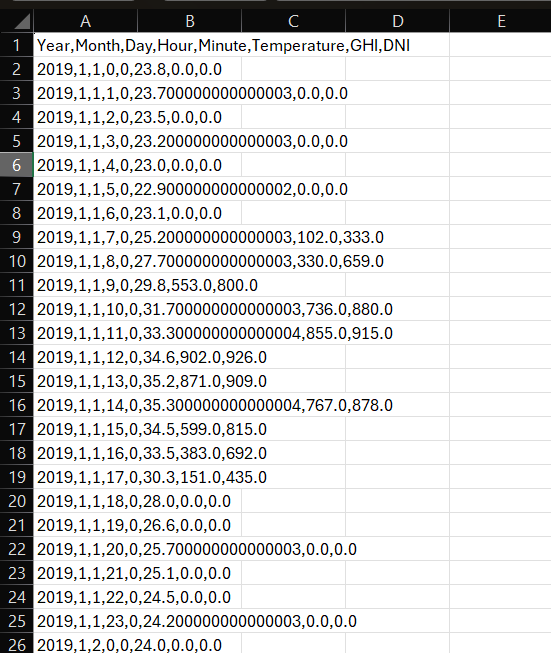

**Organizacion de datos en columnas**

In [ ]:
import pandas as pd
import csv

def separar_columnas_csv(archivo_entrada, archivo_salida=None):
    """
    Toma un archivo CSV donde los datos están en una sola columna separados por comas
    y los reorganiza para que cada dato esté en su propia columna individual.

    Parámetros:
    - archivo_entrada: nombre del archivo CSV con datos en una sola columna
    - archivo_salida: nombre del archivo de salida (opcional)

    Retorna:
    - DataFrame con columnas separadas correctamente
    """

    print("🔄 Separando datos en columnas individuales...")

    try:
        # Si no se especifica archivo de salida, generar uno automáticamente
        if archivo_salida is None:
            archivo_salida = archivo_entrada.replace('.csv', '_columnas_separadas.csv')

        print(f"📂 Procesando archivo: {archivo_entrada}")

        # Leer el archivo línea por línea para manejar los datos que están en una sola columna
        datos_procesados = []

        with open(archivo_entrada, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        # La primera línea debería tener los headers
        if lines:
            primera_linea = lines[0].strip()

            # Si la primera línea contiene comas, son los headers separados
            if ',' in primera_linea:
                headers = primera_linea.split(',')
                print(f"✅ Headers detectados: {headers}")

                # Procesar el resto de las líneas
                for i, line in enumerate(lines[1:], 2):
                    line = line.strip()
                    if line:  # Si la línea no está vacía
                        # Dividir por comas
                        valores = line.split(',')

                        # Verificar que tiene el mismo número de valores que headers
                        if len(valores) == len(headers):
                            datos_procesados.append(valores)
                        else:
                            print(f"⚠️ Línea {i} tiene {len(valores)} valores pero se esperaban {len(headers)}")

                print(f"✅ Procesadas {len(datos_procesados)} filas de datos")

                # Crear DataFrame
                df = pd.DataFrame(datos_procesados, columns=headers)

                # Convertir tipos de datos
                print("🔄 Convirtiendo tipos de datos...")

                # Columnas numéricas enteras
                columnas_enteras = ['Year', 'Month', 'Day', 'Hour', 'Minute']
                for col in columnas_enteras:
                    if col in df.columns:
                        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

                # Columnas numéricas flotantes
                columnas_flotantes = ['Temperature', 'GHI', 'DNI']
                for col in columnas_flotantes:
                    if col in df.columns:
                        df[col] = pd.to_numeric(df[col], errors='coerce')

                # Guardar con configuraciones específicas para separación correcta
                print(f"💾 Guardando archivo separado: {archivo_salida}")

                # Método 1: Guardar con pandas (separador punto y coma para Excel)
                df.to_csv(archivo_salida, index=False, sep=';', encoding='utf-8')

                # Método 2: También crear versión con comas para compatibilidad
                archivo_comas = archivo_salida.replace('.csv', '_comas.csv')
                df.to_csv(archivo_comas, index=False, sep=',', encoding='utf-8')

                # Método 3: Crear versión Excel-friendly
                archivo_excel = archivo_salida.replace('.csv', '.xlsx')
                df.to_excel(archivo_excel, index=False)

                print(f"✅ Archivos creados:")
                print(f"   - {archivo_salida} (separado por punto y coma)")
                print(f"   - {archivo_comas} (separado por comas)")
                print(f"   - {archivo_excel} (formato Excel)")

                # Mostrar información del resultado
                print(f"\n📊 INFORMACIÓN DEL ARCHIVO SEPARADO:")
                print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
                print(f"Columnas: {list(df.columns)}")

                # Mostrar las primeras filas para verificar
                print(f"\n👀 PRIMERAS 3 FILAS (verificación):")
                print(df.head(3).to_string())

                # Verificar tipos de datos
                print(f"\n📋 TIPOS DE DATOS:")
                for col in df.columns:
                    print(f"   {col}: {df[col].dtype}")

                return df

            else:
                print("❌ Error: La primera línea no contiene separadores de comas")
                return None
        else:
            print("❌ Error: El archivo está vacío")
            return None

    except FileNotFoundError:
        print(f"❌ Error: No se encontró el archivo '{archivo_entrada}'")
        return None
    except Exception as e:
        print(f"❌ Error inesperado: {str(e)}")
        return None

def verificar_separacion(archivo_csv):
    """
    Función para verificar que las columnas están correctamente separadas
    """
    print(f"\n🔍 VERIFICANDO SEPARACIÓN DE COLUMNAS EN: {archivo_csv}")

    try:
        # Probar diferentes separadores
        separadores = [',', ';', '\t']

        for sep in separadores:
            try:
                df_test = pd.read_csv(archivo_csv, sep=sep, nrows=5)
                print(f"\n✅ Con separador '{sep}':")
                print(f"   Columnas detectadas: {df_test.shape[1]}")
                print(f"   Nombres: {list(df_test.columns)}")

                if df_test.shape[1] > 1:  # Si detectó múltiples columnas
                    print(f"   Primera fila de datos:")
                    if len(df_test) > 0:
                        print(f"   {df_test.iloc[0].to_dict()}")
                    return sep, df_test
            except:
                continue

        print("❌ No se pudo determinar el separador correcto")
        return None, None

    except Exception as e:
        print(f"❌ Error al verificar: {str(e)}")
        return None, None

# FUNCIÓN PRINCIPAL PARA EJECUTAR TODO EL PROCESO
def procesar_archivo_completo(nombre_archivo):
    """
    Procesa completamente un archivo CSV para separar columnas
    """
    print("="*60)
    print("🚀 PROCESADOR COMPLETO DE ARCHIVOS NSRDB")
    print("="*60)

    # Paso 1: Separar columnas
    df_separado = separar_columnas_csv(nombre_archivo)

    if df_separado is not None:
        # Paso 2: Verificar que la separación funcionó
        archivo_salida = nombre_archivo.replace('.csv', '_columnas_separadas.csv')
        sep_detectado, df_verificado = verificar_separacion(archivo_salida)

        if sep_detectado and df_verificado is not None:
            print(f"\n🎉 ¡PROCESO COMPLETADO EXITOSAMENTE!")
            print(f"📁 Usa el archivo: {archivo_salida}")
            print(f"🔧 Separador recomendado: '{sep_detectado}'")

            # Mostrar estadísticas finales
            print(f"\n📈 ESTADÍSTICAS FINALES:")
            for col in ['Temperature', 'GHI', 'DNI']:
                if col in df_verificado.columns:
                    valores_numericos = pd.to_numeric(df_verificado[col], errors='coerce')
                    print(f"   {col}: Promedio = {valores_numericos.mean():.2f}")
        else:
            print(f"\n⚠️ El archivo se creó pero hay problemas con la separación")

    return df_separado

# EJECUTAR EL PROCESAMIENTO
if __name__ == "__main__":
    # Cambiar este nombre por el de tu archivo limpio
    nombre_archivo_limpio = "Berlin_sinordern_limpio.csv"

    # Ejecutar procesamiento completo
    resultado = procesar_archivo_completo(nombre_archivo_limpio)

    if resultado is not None:
        print(f"\n✅ Archivo procesado correctamente")
        print(f"📂 Busca los archivos generados en la misma carpeta:")
        print(f"   - *_columnas_separadas.csv (punto y coma)")
        print(f"   - *_columnas_separadas_comas.csv (comas)")
        print(f"   - *_columnas_separadas.xlsx (Excel)")
    else:
        print(f"\n❌ Hubo problemas al procesar el archivo")

## **Resultados despues de ser procesado**
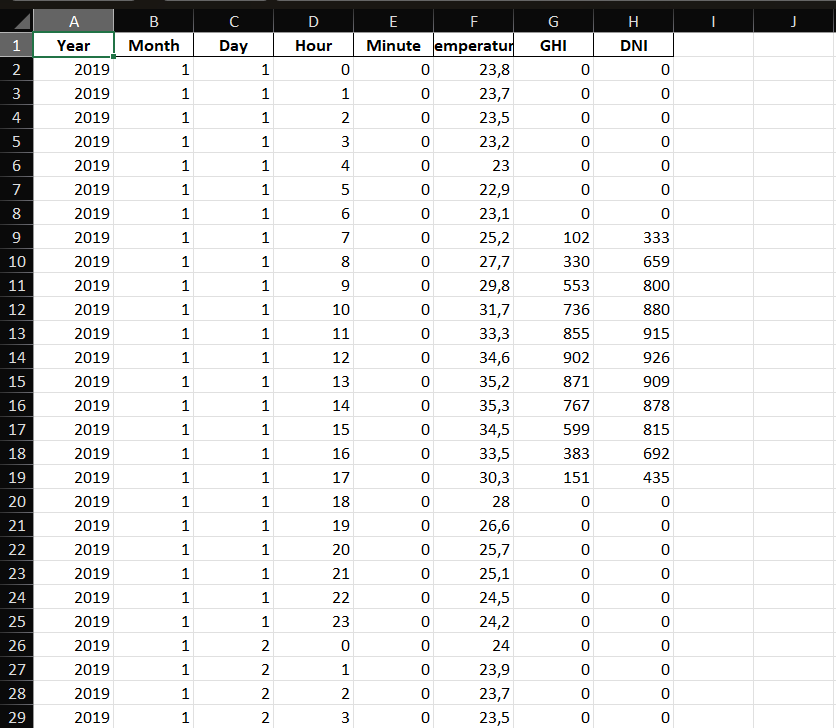

**Analisis de datos solares**

In [ ]:
|import pandas as pd
import numpy as np


# CARGA DEL ARCHIVO
# --------------------------------------------------------
df = pd.read_csv("Berlín_Archivo_limpio.csv", sep=";")
#---------------------------------------------------------

print("Columnas detectadas:")
print(df.columns.tolist())


ghi_col = None
for c in df.columns:
    if c.strip().upper() == "GHI":
        ghi_col = c
        break
if ghi_col is None:
    raise SystemExit("No se encontró columna GHI. Revisa el nombre exacto de la columna.")

def clean_numeric(val):
    if pd.isna(val):
        return None
    s = str(val).strip()
    if s == "":
        return None

    if (',' in s) and (s.count('.') == 0) and (s.count(',') == 1):
        s = s.replace(',', '.')

    if s.count('.') > 1:
        s = s.replace('.', '')

    s = s.replace(' ', '')
    try:
        return float(s)
    except:
        return None

# --------------------------------------------------------
# 3) Preparar arreglos temporales
# --------------------------------------------------------
has_ymdh = all(col in df.columns for col in ['Year','Month','Day','Hour'])
if has_ymdh:
    year_col = 'Year'
    month_col = 'Month'
    day_col = 'Day'
    hour_col = 'Hour'
else:
    # fallback: crear índices sintéticos (día = fila//24, hora = fila%24)
    year_col = None
    month_col = None
    day_col = None
    hour_col = None

# --------------------------------------------------------
# 4) recorrer fila por fila y acumular manualmente
#    acumuladores: total, conteo, max/min, diarios, mensuales, anuales
# --------------------------------------------------------
total_sum = 0.0
total_count = 0
max_val = -1e18
max_idx = -1
min_val = 1e18
min_idx = -1

daily_sum = {}   # key = (year,month,day) -> suma Wh/m2 (si cada fila=1h)
daily_count = {}
monthly_sum = {} # key = (year,month)
monthly_count = {}
annual_sum = {}  # key = year
annual_count = {}

# para variaciones estacionales (mes del año, 1..12) acumulamos sobre todos los años
monthofyear_sum = {m:0.0 for m in range(1,13)}
monthofyear_count = {m:0   for m in range(1,13)}

for i in range(len(df)):
    raw = df.iloc[i][ghi_col]
    val = clean_numeric(raw)
    if val is None:
        continue  # ignorar datos no numéricos
    # total
    total_sum += val
    total_count += 1
    # max/min
    if val > max_val:
        max_val = val
        max_idx = i
    if val < min_val:
        min_val = val
        min_idx = i
    # obtener fecha/hora
    if has_ymdh:
        y = int(df.iloc[i]['Year'])
        m = int(df.iloc[i]['Month'])
        d = int(df.iloc[i]['Day'])
        h = int(df.iloc[i]['Hour'])
    else:
        # fallback: días por bloques de 24 registros
        y = 0
        m = 0
        d = i // 24
        h = i % 24
    # diario
    kd = (y,m,d)
    daily_sum[kd] = daily_sum.get(kd, 0.0) + val
    daily_count[kd] = daily_count.get(kd, 0) + 1
    # mensual
    km = (y,m)
    monthly_sum[km] = monthly_sum.get(km, 0.0) + val
    monthly_count[km] = monthly_count.get(km, 0) + 1
    # anual
    ky = y
    annual_sum[ky] = annual_sum.get(ky, 0.0) + val
    annual_count[ky] = annual_count.get(ky, 0) + 1
    # mes del año (para variación estacional)
    mo = m if m!=0 else ( (d % 12) + 1 )  # si no hay month, crear algo para no romper
    monthofyear_sum[mo] = monthofyear_sum.get(mo, 0.0) + val
    monthofyear_count[mo] = monthofyear_count.get(mo, 0) + 1

# proteger divisiones por cero
if total_count == 0:
    raise SystemExit("No hay registros numéricos válidos en la columna GHI.")

# --------------------------------------------------------
# 5) cálculos finales
# --------------------------------------------------------
promedio_general = total_sum / total_count  # promedio sobre todas las horas

# promedios diarios (suma/cantidad por día)
daily_avg = {}
for k in daily_sum:
    c = daily_count.get(k, 0)
    if c>0:
        daily_avg[k] = daily_sum[k] / c
    else:
        daily_avg[k] = None

# promedios mensuales
monthly_avg = {}
for k in monthly_sum:
    c = monthly_count.get(k, 0)
    if c>0:
        monthly_avg[k] = monthly_sum[k] / c
    else:
        monthly_avg[k] = None

# promedios anuales
annual_avg = {}
for k in annual_sum:
    c = annual_count.get(k, 0)
    if c>0:
        annual_avg[k] = annual_sum[k] / c
    else:
        annual_avg[k] = None

# variación estacional: promedio por mes del año (enero..diciembre)
seasonal_avg = {}
month_names = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
for mo in range(1,13):
    c = monthofyear_count.get(mo,0)
    if c>0:
        seasonal_avg[mo] = monthofyear_sum.get(mo,0.0) / c
    else:
        seasonal_avg[mo] = None

# energía total (Wh/m2) por día/mes/año (ya están en daily_sum etc.)
# ordenar claves para presentación
sorted_daily_keys = sorted(daily_sum.keys())
sorted_monthly_keys = sorted(monthly_sum.keys())
sorted_annual_keys = sorted(annual_sum.keys())

# info de máximo y mínimo (ubicación)
if max_idx >= 0:
    if has_ymdh:
        max_info = (int(df.iloc[max_idx]['Year']), int(df.iloc[max_idx]['Month']),
                    int(df.iloc[max_idx]['Day']), int(df.iloc[max_idx]['Hour']), float(max_val))
    else:
        max_info = ("synthetic", int(df.index[max_idx] // 24), int(df.index[max_idx] % 24), float(max_val))
else:
    max_info = None

if min_idx >= 0:
    if has_ymdh:
        min_info = (int(df.iloc[min_idx]['Year']), int(df.iloc[min_idx]['Month']),
                    int(df.iloc[min_idx]['Day']), int(df.iloc[min_idx]['Hour']), float(min_val))
    else:
        min_info = ("synthetic", int(df.index[min_idx] // 24), int(df.index[min_idx] % 24), float(min_val))
else:
    min_info = None

# --------------------------------------------------------
# 6) indicador: potencial energético del panel de referencia
#
# --------------------------------------------------------
area_panel_m2 = 2.703
eficiencia_panel = 0.21
#---------------------------------------------------------
energia_total_wh_m2 = total_sum
potencial_panel_wh = energia_total_wh_m2 * area_panel_m2 * eficiencia_panel
potencial_panel_kwh = potencial_panel_wh / 1000.0

# --------------------------------------------------------
# Impresión organizada (
# --------------------------------------------------------
print("\n" + "="*70)
print("ANÁLISIS DE RADIACIÓN (columna -> {})".format(ghi_col))
print("="*70)
print(f"Registros totales (filas): {len(df)}    Registros GHI válidos: {total_count}")
print(f"\nPROMEDIOS:")
print(f"  • Promedio general (todas las horas): {promedio_general:.2f} W/m²")

# Promedio diario (mostrar primeros 7 días)
print("\n  • Promedio diario (primeros 7 días ordenados):")
for i, k in enumerate(sorted_daily_keys[:7], start=1):
    y,m,d = k
    avg = daily_avg[k]
    cnt = daily_count[k]
    print(f"     {i:02d}) {y:04d}-{m:02d}-{d:02d} -> Promedio = {avg:.2f} W/m²  (horas registradas: {cnt})")

# Promedio mensual
print("\n  • Promedio mensual (por año-mes):")
for k in sorted_monthly_keys:
    y,m = k
    avg = monthly_avg[k]
    cnt = monthly_count[k]
    print(f"     - {y:04d}-{m:02d} -> Promedio = {avg:.2f} W/m²  (horas: {cnt})")

# Promedio anual
print("\n  • Promedio anual (por año):")
for k in sorted_annual_keys:
    avg = annual_avg[k]
    cnt = annual_count[k]
    print(f"     - {k:04d} -> Promedio = {avg:.2f} W/m²  (horas: {cnt})")

# Horas de max/min
print("\nHORAS DE MÁXIMA Y MÍNIMA RADIACIÓN:")
if max_info and has_ymdh:
    print(f"  • Máxima: {max_info[4]:.2f} W/m²   en {max_info[0]:04d}-{max_info[1]:02d}-{max_info[2]:02d} a las {max_info[3]:02d}:00")
elif max_info:
    print(f"  • Máxima: {max_info}")
if min_info and has_ymdh:
    print(f"  • Mínima: {min_info[4]:.2f} W/m²   en {min_info[0]:04d}-{min_info[1]:02d}-{min_info[2]:02d} a las {min_info[3]:02d}:00")
elif min_info:
    print(f"  • Mínima: {min_info}")

# Variaciones estacionales (promedio por mes-of-year)
print("\nVARIACIONES ESTACIONALES (promedio por mes del año):")
for mo in range(1,13):
    avg = seasonal_avg.get(mo, None)
    if avg is not None:
        print(f"  {month_names[mo-1]:3s}: {avg:.2f} W/m²")

# Energía por mes/día/año
print("\nINDICADORES ENERGÉTICOS (Wh/m²):")
print(f"  • Energía total (suma de todas las horas): {energia_total_wh_m2:.2f} Wh/m²")

print("\n  • Energía por mes (primeros 12 meses listados):")
for k in sorted_monthly_keys[:12]:
    y,m = k
    s = monthly_sum[k]
    cnt = monthly_count[k]
    print(f"     - {y:04d}-{m:02d} -> {s:.2f} Wh/m²  (horas: {cnt})")

print("\n  • Energía por día (primeros 7 días listados):")
for k in sorted_daily_keys[:7]:
    y,m,d = k
    s = daily_sum[k]
    cnt = daily_count[k]
    print(f"     - {y:04d}-{m:02d}-{d:02d} -> {s:.2f} Wh/m²  (horas: {cnt})")

print("POTENCIAL ENERGÉTICO (panel de referencia):")
print(f"  • Área panel: {area_panel_m2} m²")
print(f"  • Eficiencia panel: {eficiencia_panel*100:.1f}%")
print(f"  • Potencial total ≈ {potencial_panel_wh:.2f} Wh  = {potencial_panel_kwh:.2f} kWh")

print("="*70)
print("FIN DEL ANÁLISIS")
print("="*70)


Columnas detectadas:
['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'GHI', 'DNI']

ANÁLISIS DE RADIACIÓN (columna -> GHI)
Registros totales (filas): 8760    Registros GHI válidos: 8760

PROMEDIOS:
  • Promedio general (todas las horas): 106.83 W/m²

  • Promedio diario (primeros 7 días ordenados):
     01) 2019-01-01 -> Promedio = 18.96 W/m²  (horas registradas: 24)
     02) 2019-01-02 -> Promedio = 10.92 W/m²  (horas registradas: 24)
     03) 2019-01-03 -> Promedio = 5.17 W/m²  (horas registradas: 24)
     04) 2019-01-04 -> Promedio = 2.96 W/m²  (horas registradas: 24)
     05) 2019-01-05 -> Promedio = 26.71 W/m²  (horas registradas: 24)
     06) 2019-01-06 -> Promedio = 3.08 W/m²  (horas registradas: 24)
     07) 2019-01-07 -> Promedio = 26.62 W/m²  (horas registradas: 24)

  • Promedio mensual (por año-mes):
     - 2019-01 -> Promedio = 15.63 W/m²  (horas: 744)
     - 2019-02 -> Promedio = 42.61 W/m²  (horas: 672)
     - 2019-03 -> Promedio = 49.68 W/m²  (horas: 744)
    

## **Obtención de Graficas**

✅ Archivos cargados correctamente
Montería shape: (8760, 8)
Berlín shape: (8760, 8)


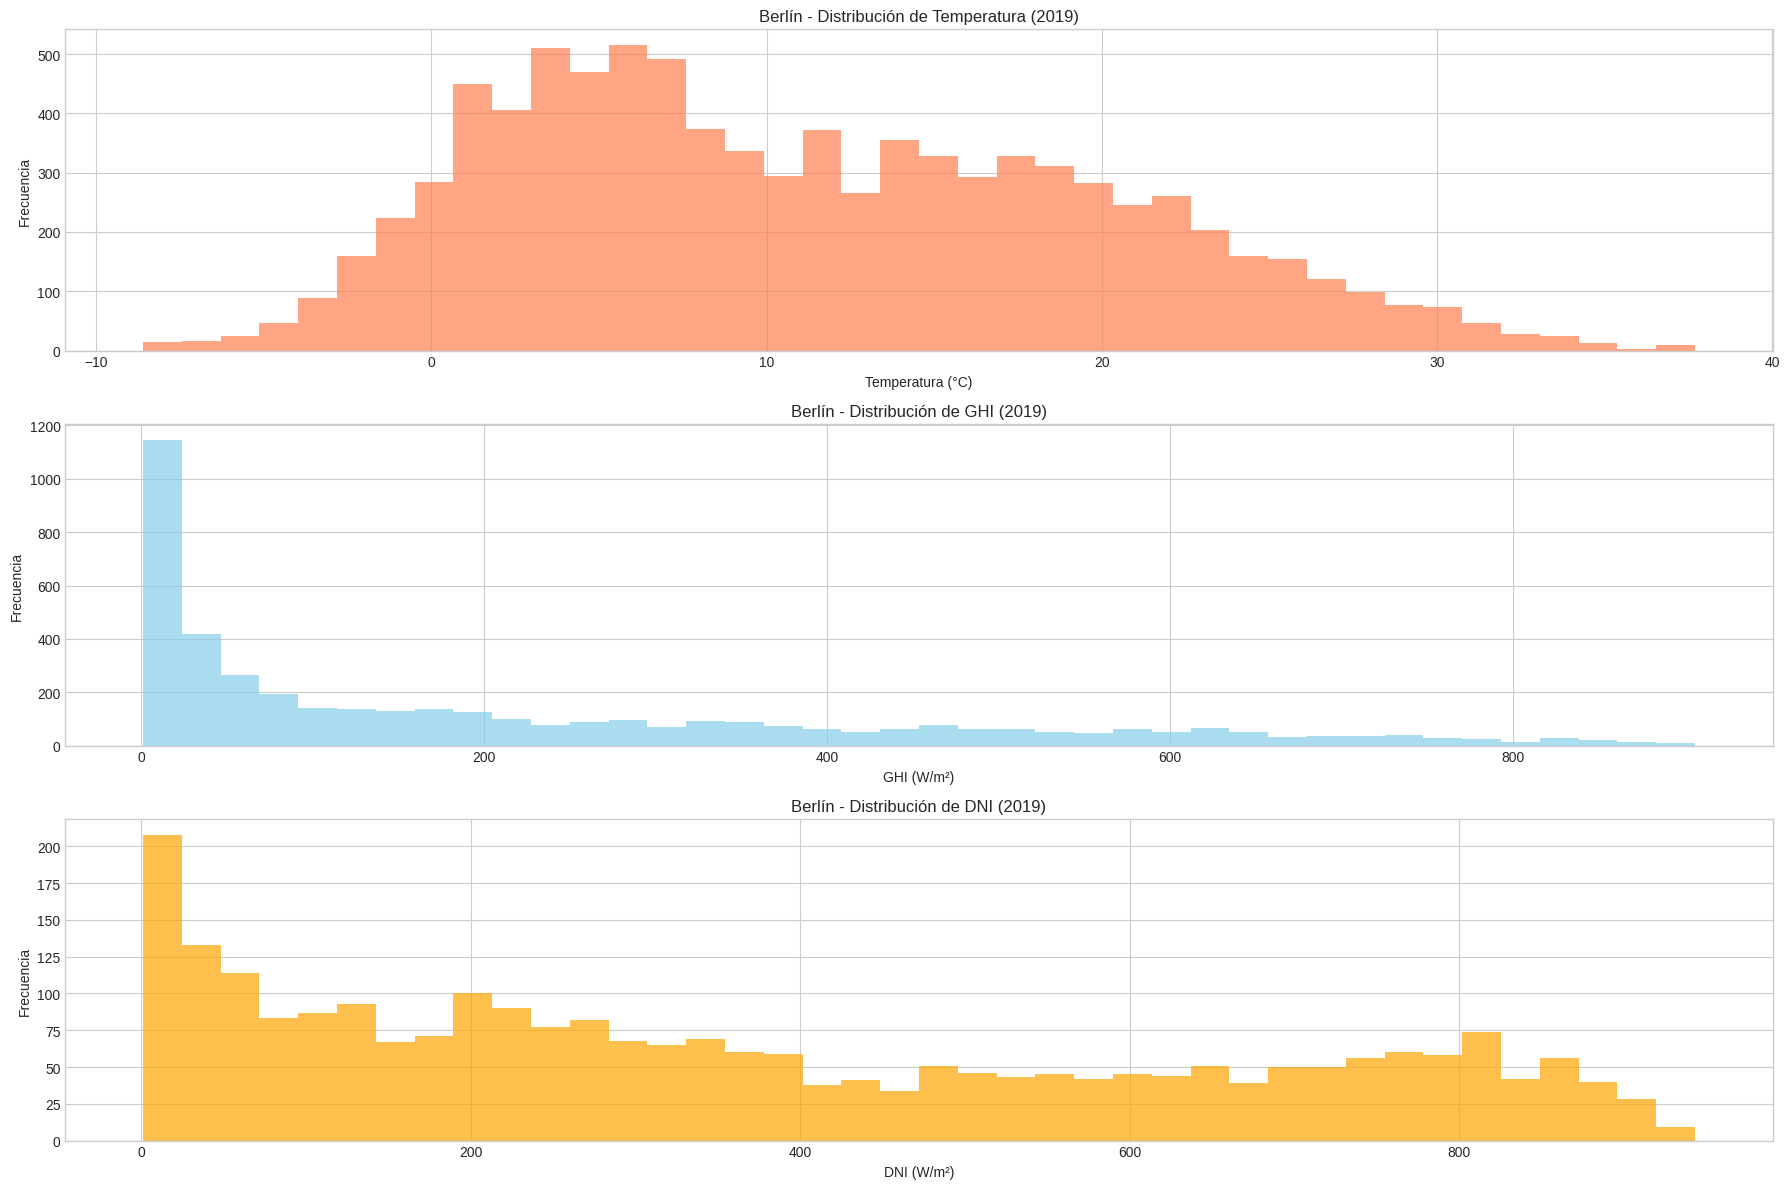

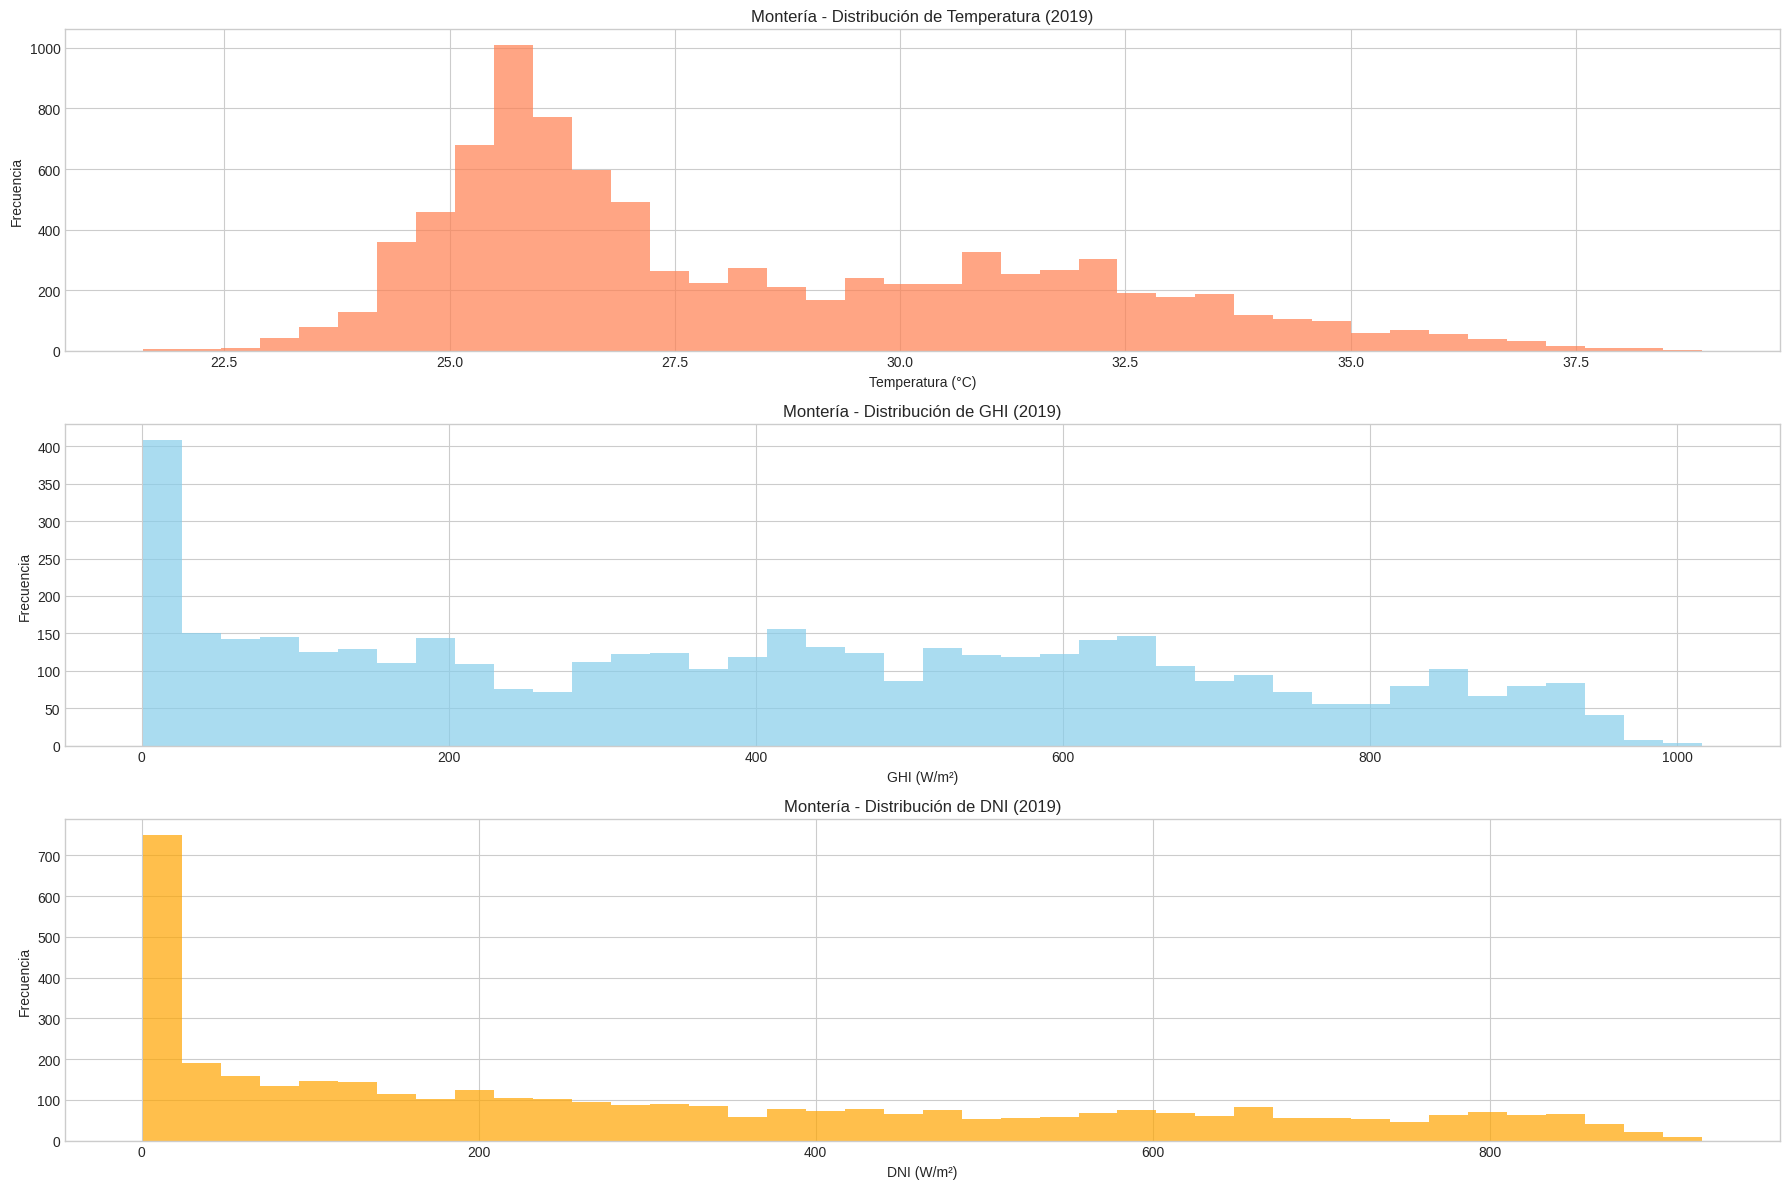

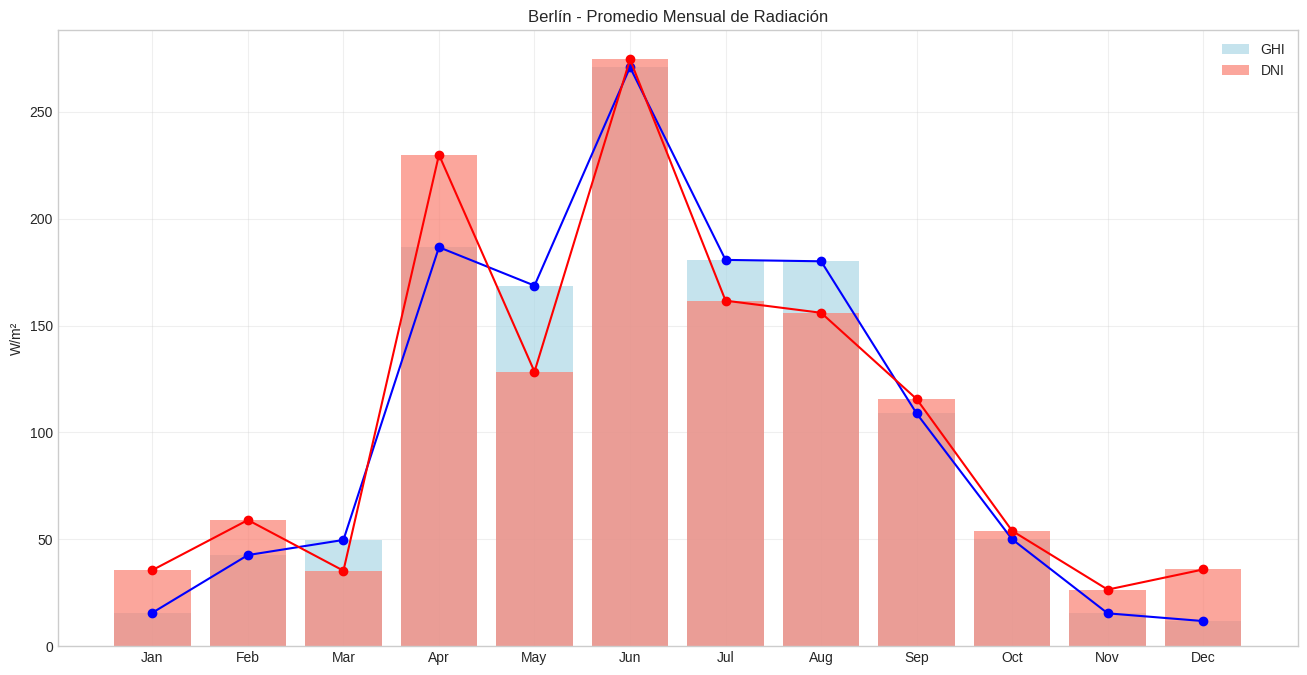

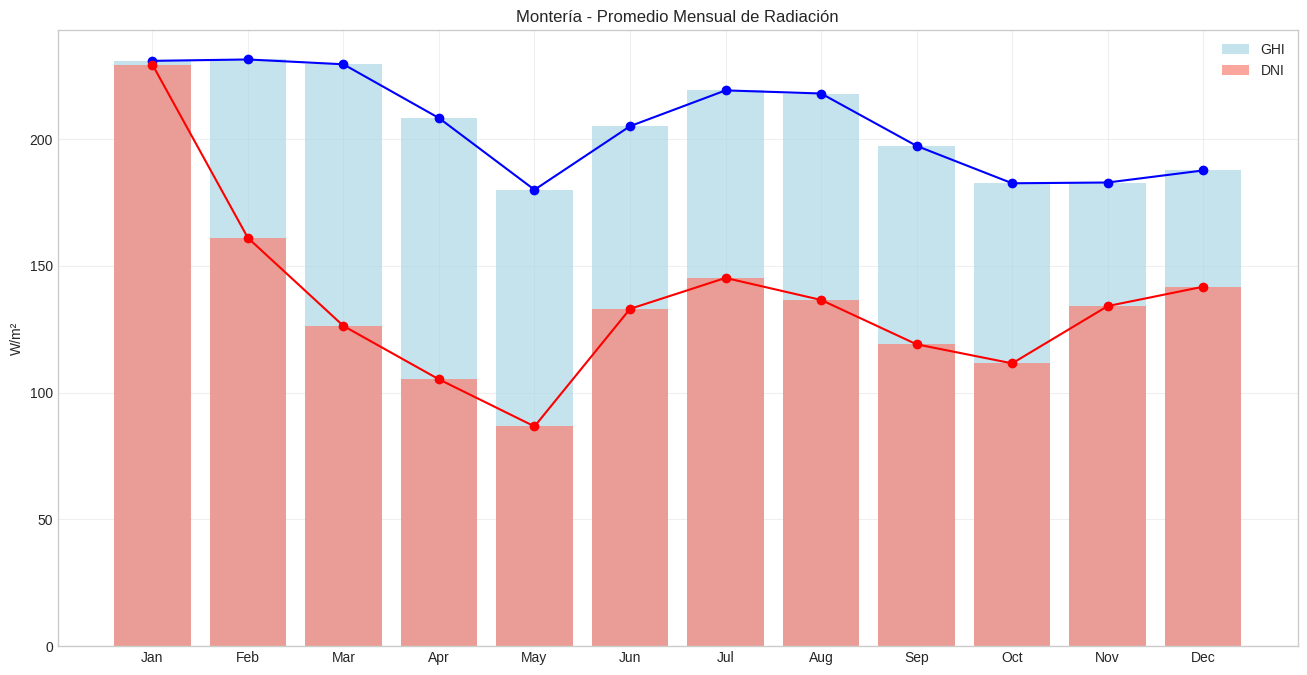

Berlín - Producción anual estimada: 323.78 kWh por panel de 1.7m²
Montería - Producción anual estimada: 595.79 kWh por panel de 1.7m²
✅ Archivos procesados guardados en /content/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import FuncFormatter

# === RUTAS DE ARCHIVOS EN /content/ ===
file_monteria = "/content/Monteria_archivo_limpio.csv.csv"  # 👈 usa el nombre exacto
file_berlin   = "/content/Berlin_archivo_limpio.xlsx"

# === CARGAR ARCHIVOS ===
data_m = pd.read_csv(file_monteria)
data_b = pd.read_excel(file_berlin)

print("✅ Archivos cargados correctamente")
print("Montería shape:", data_m.shape)
print("Berlín shape:", data_b.shape)

# === FUNCIÓN DE PREPROCESAMIENTO ===
def preprocess(data, city):
    data['Datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
    data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
    data['DayOfYear'] = data['Datetime'].dt.dayofyear
    data['MonthName'] = data['Datetime'].dt.strftime('%b')
    data['City'] = city
    return data

data_m = preprocess(data_m, "Montería")
data_b = preprocess(data_b, "Berlín")

# === UNIR DATOS ===
data_all = pd.concat([data_m, data_b], ignore_index=True)

# === FORMATO EJE Y ===
def w_per_m2_formatter(x, pos):
    return f'{int(x)} W/m²'

# === DISTRIBUCIÓN DE TEMPERATURA Y RADIACIÓN ===
for city, df in data_all.groupby("City"):
    plt.figure(figsize=(18, 12))

    plt.subplot(3, 1, 1)
    plt.hist(df['Temperature'], bins=40, color="coral", alpha=0.7)
    plt.title(f"{city} - Distribución de Temperatura (2019)")
    plt.xlabel("Temperatura (°C)")
    plt.ylabel("Frecuencia")

    plt.subplot(3, 1, 2)
    plt.hist(df[df['GHI'] > 0]['GHI'], bins=40, color="skyblue", alpha=0.7)
    plt.title(f"{city} - Distribución de GHI (2019)")
    plt.xlabel("GHI (W/m²)")
    plt.ylabel("Frecuencia")

    plt.subplot(3, 1, 3)
    plt.hist(df[df['DNI'] > 0]['DNI'], bins=40, color="orange", alpha=0.7)
    plt.title(f"{city} - Distribución de DNI (2019)")
    plt.xlabel("DNI (W/m²)")
    plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

# === PROMEDIOS MENSUALES ===
for city, df in data_all.groupby("City"):
    monthly = df.groupby("Month").agg({"GHI":"mean","DNI":"mean","Temperature":"mean"}).reset_index()
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

    plt.figure(figsize=(16, 8))
    plt.bar(monthly['Month'], monthly['GHI'], color="lightblue", alpha=0.7, label="GHI")
    plt.plot(monthly['Month'], monthly['GHI'], "o-", color="blue")
    plt.bar(monthly['Month'], monthly['DNI'], color="salmon", alpha=0.7, label="DNI")
    plt.plot(monthly['Month'], monthly['DNI'], "o-", color="red")
    plt.xticks(range(1,13), months)
    plt.title(f"{city} - Promedio Mensual de Radiación")
    plt.ylabel("W/m²")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# === SIMULACIÓN PANEL SOLAR ===
class SolarPanel:
    def __init__(self, area=1.7, efficiency=0.2, temp_coefficient=-0.004, nominal_temp=25):
        self.area = area
        self.efficiency = efficiency
        self.temp_coefficient = temp_coefficient
        self.nominal_temp = nominal_temp

    def calculate_power(self, ghi, temperature):
        temp_factor = 1 + self.temp_coefficient * (temperature - self.nominal_temp)
        adjusted_efficiency = self.efficiency * temp_factor
        return ghi * self.area * adjusted_efficiency

panel = SolarPanel()

for city, df in data_all.groupby("City"):
    df['Power'] = df.apply(lambda r: panel.calculate_power(r['GHI'], r['Temperature']), axis=1)
    df['Energy_kWh'] = df['Power'] / 1000  # considerando intervalo de 1 hora
    annual = df['Energy_kWh'].sum()

    print(f"{city} - Producción anual estimada: {annual:.2f} kWh por panel de 1.7m²")

# === GUARDAR RESULTADOS LOCALMENTE ===
data_m.to_csv("/content/Monteria_Procesado.csv", index=False)
data_b.to_csv("/content/Berlin_Procesado.csv", index=False)
print("✅ Archivos procesados guardados en /content/")


SIMULACIÓN PANEL SOLAR TRINA 585W - EVALUACIÓN 4 OOP

Archivos detectados: Monteria_archivo_limpio.csv, Berlin_archivo_limpio.xlsx
Intentando leer Monteria_archivo_limpio.csv como CSV con encoding utf-8...
Éxito con encoding utf-8, filas: 8760
Monteria: valores únicos en Minute -> [np.int64(0)]
Monteria: ya estaba en datos horarios (Minute==0)
Intentando leer Berlin_archivo_limpio.xlsx como Excel...
Éxito al leer Excel, filas: 8760
Berlin: valores únicos en Minute -> [np.int64(30)]
Berlin: solo tiene Minute==30, se ajustan a hora completa
Archivo combinado guardado como datos_combinados.csv

Resumen de registros por ubicación:
Ubicacion
Berlin      8760
Monteria    8760
dtype: int64

Columnas del dataset combinado:
['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'GHI', 'DNI', 'Ubicacion']

Estadísticas básicas:
           Year         Month           Day          Hour   Minute  \
count   17520.0  17520.000000  17520.000000  17520.000000  17520.0   
unique      NaN           NaN           NaN           NaN      NaN   
top        

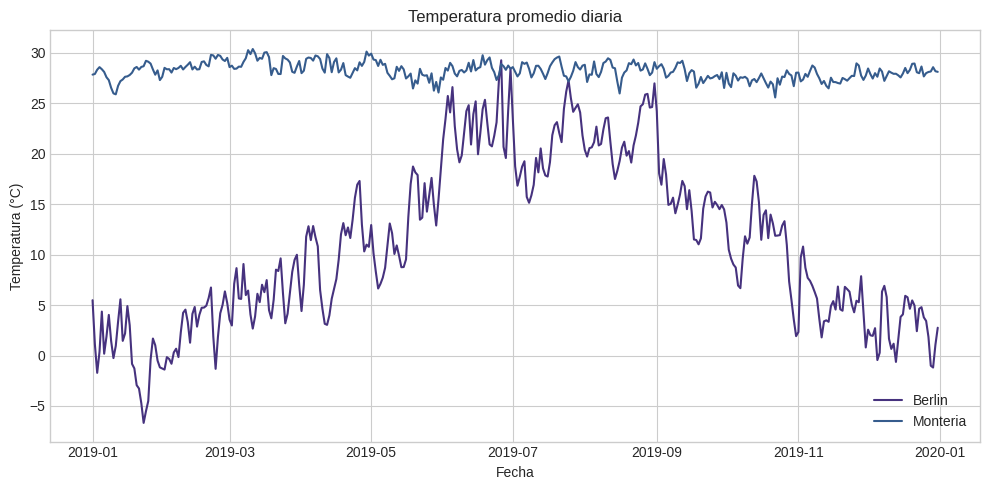

In [ ]:
# file: unir_datos_meteorologicos.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ENCODINGS = ["utf-8", "latin-1", "iso-8859-1", "cp1252"]

EXPECTED_COLS = ["Year", "Month", "Day", "Hour", "Minute", "Temperature", "GHI", "DNI"]

def leer_archivo(path: str) -> pd.DataFrame:
    if path.endswith(".csv"):
        for enc in ENCODINGS:
            try:
                print(f"Intentando leer {path} como CSV con encoding {enc}...")
                df = pd.read_csv(path, encoding=enc, on_bad_lines="skip")
                print(f"Éxito con encoding {enc}, filas: {len(df)}")
                return df
            except Exception as e:
                print(f"Fallo con {enc}: {e}")
        raise ValueError(f"No se pudo leer el archivo CSV {path}.")
    elif path.endswith((".xls", ".xlsx")):
        try:
            print(f"Intentando leer {path} como Excel...")
            df = pd.read_excel(path, engine="openpyxl")
            print(f"Éxito al leer Excel, filas: {len(df)}")
            return df
        except Exception as e:
            raise ValueError(f"No se pudo leer el archivo Excel {path}: {e}")
    else:
        raise ValueError(f"Formato no soportado: {path}")

def validar_columnas(df: pd.DataFrame, nombre: str) -> None:
    faltantes = [c for c in EXPECTED_COLS if c not in df.columns]
    if faltantes:
        raise ValueError(f"{nombre} no tiene las columnas requeridas: {faltantes}")

def preparar_dataset(path: str, ubicacion: str) -> pd.DataFrame:
    df = leer_archivo(path)
    validar_columnas(df, ubicacion)

    df["Minute"] = pd.to_numeric(df["Minute"], errors="coerce")
    minutos_unicos = sorted(df["Minute"].dropna().unique())
    print(f"{ubicacion}: valores únicos en Minute -> {minutos_unicos}")

    if set(minutos_unicos) == {0, 30}:
        df = df[df["Minute"] == 0].copy()
        print(f"{ubicacion}: tenía datos cada 30 min, se filtran Minute==0")
    elif set(minutos_unicos) == {0}:
        print(f"{ubicacion}: ya estaba en datos horarios")
    elif set(minutos_unicos) == {30}:
        print(f"{ubicacion}: solo Minute==30, ajustando a hora completa")
        df = df.copy()
        df["Hour"] = (df["Hour"] + 1) % 24
        df.loc[df["Hour"] == 0, "Day"] += 1
        df["Minute"] = 0
    else:
        print(f"{ubicacion}: formato de minutos inesperado, se mantiene sin cambios")

    df["Ubicacion"] = ubicacion

    if len(df) < 8000:
        raise ValueError(f"{ubicacion} tiene menos de 8000 registros ({len(df)})")

    return df

def main():
    # 👉 Ajusta aquí los nombres manualmente
    monteria_file = "Monteria_archivo_limpio.csv"
    berlin_file = "Berlin_archivo_limpio.xlsx"

    print(f"Archivos definidos: {monteria_file}, {berlin_file}")

    df_monteria = preparar_dataset(monteria_file, "Monteria")
    df_berlin = preparar_dataset(berlin_file, "Berlin")

    combinado = pd.concat([df_monteria, df_berlin], ignore_index=True)
    combinado.to_csv("datos_combinados.csv", index=False, encoding="utf-8")
    print("Archivo combinado guardado como datos_combinados.csv")

    print("\nResumen de registros por ubicación:")
    print(combinado.groupby("Ubicacion").size())

    print("\nColumnas del dataset combinado:")
    print(combinado.columns.tolist())

    print("\nEstadísticas básicas:")
    print(combinado.describe(include="all"))

    try:
        combinado["Fecha"] = pd.to_datetime(
            combinado[["Year", "Month", "Day", "Hour"]],
            errors="coerce"
        )
        temp_promedio = (
            combinado.groupby(["Ubicacion", combinado["Fecha"].dt.date])["Temperature"]
            .mean()
            .reset_index()
        )

        plt.figure(figsize=(10, 5))
        for loc in temp_promedio["Ubicacion"].unique():
            subset = temp_promedio[temp_promedio["Ubicacion"] == loc]
            plt.plot(subset["Fecha"], subset["Temperature"], label=loc)
        plt.title("Temperatura promedio diaria")
        plt.xlabel("Fecha")
        plt.ylabel("Temperatura (°C)")
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"No se pudo generar gráfico: {e}")

if __name__ == "__main__":
    main()


Producción anual Berlín: 451.2 kWh
Producción anual Montería: 822.6 kWh


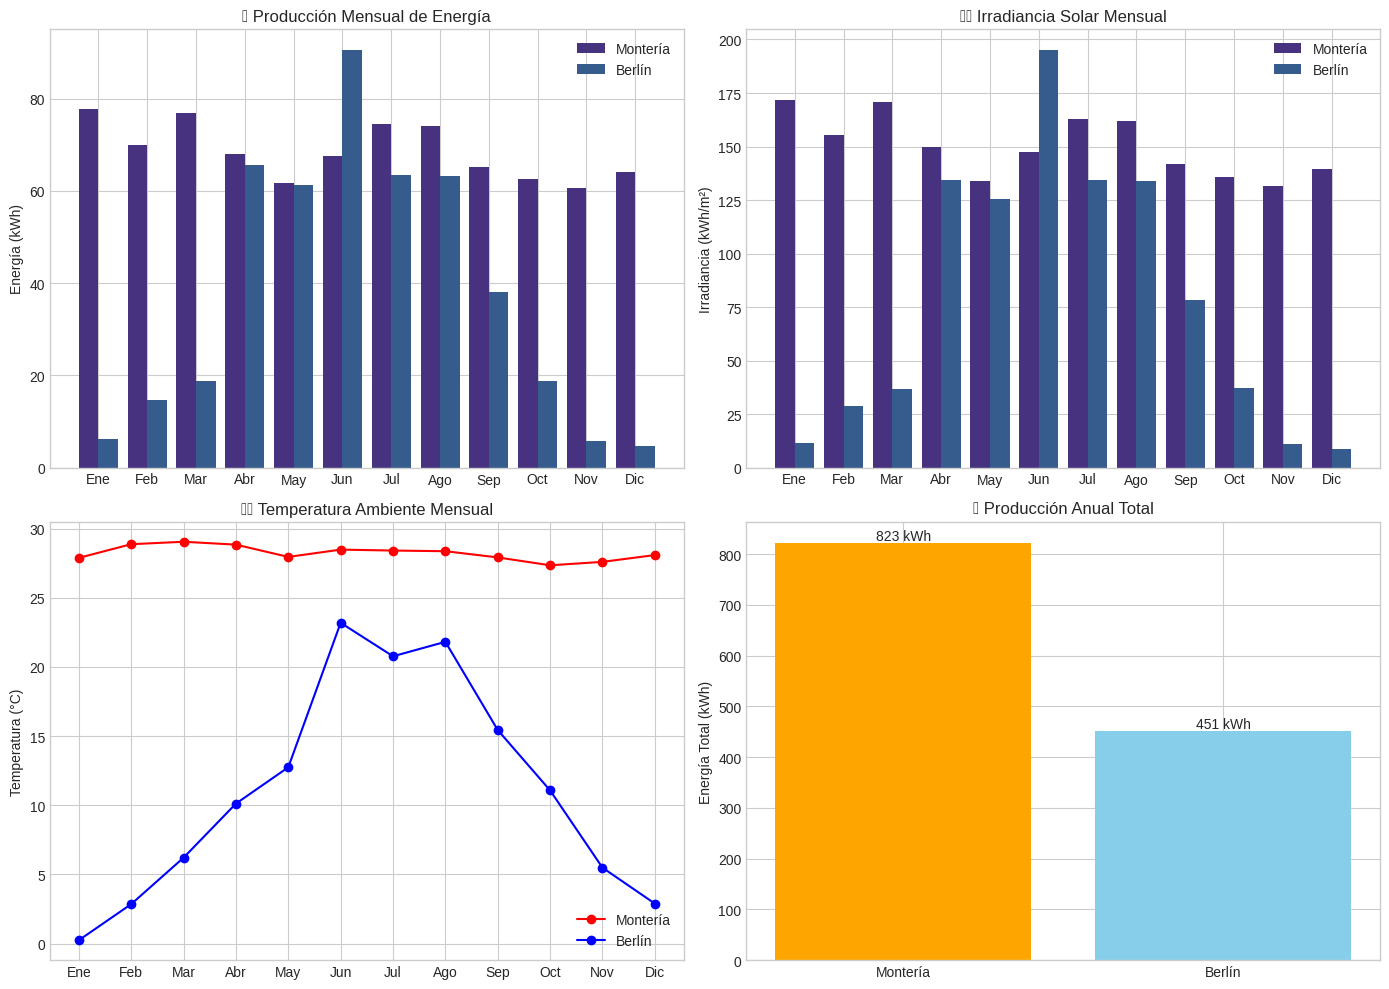

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Clase PanelSolar
# ==============================
class PanelSolar:
    def __init__(self):
        # Especificaciones del Trina 585W
        self.potencia_nominal = 585     # Potencia nominal en STC (W)
        self.area = 2.703               # Área del panel (m²)
        self.eficiencia = 21.6          # Eficiencia nominal (%)
        self.coef_temp = -0.34 / 100    # Coeficiente temperatura convertido a fracción
        self.noct = 43                  # Temperatura nominal de operación de celda (°C)
        self.factor_perdidas = 0.85     # Factor de pérdidas del sistema (15%)

    def calcular_temp_celda(self, temp_amb, ghi):
        # Usa modelo NOCT para estimar temperatura de celda
        if ghi <= 0 or np.isnan(ghi):
            return temp_amb
        return temp_amb + (self.noct - 20) * (ghi / 800)

    def calcular_potencia(self, ghi, temp_celda):
        # Ajusta potencia según irradiancia y temperatura
        if ghi <= 0 or np.isnan(ghi):
            return 0
        factor_G = ghi / 1000  # normaliza contra STC (1000 W/m²)
        factor_T = 1 + self.coef_temp * (temp_celda - 25)  # corrección térmica
        P = self.potencia_nominal * factor_G * factor_T * self.factor_perdidas
        return max(P, 0)  # evita negativos

    def procesar(self, df):
        # Calcula columnas nuevas: temp_celda, potencia, energía
        datos = df.copy()
        datos["temp_celda"] = [
            self.calcular_temp_celda(t, g) for t, g in zip(datos["temperature"], datos["ghi"])
        ]
        datos["potencia_W"] = [
            self.calcular_potencia(g, tc) for g, tc in zip(datos["ghi"], datos["temp_celda"])
        ]
        datos["energia_Wh"] = datos["potencia_W"]  # cada fila ≈ 1h → energía en Wh
        return datos

# ==============================
# Funciones auxiliares
# ==============================
def cargar_datos(path="datos_combinados.csv"):
    # Lee CSV, normaliza nombres y filtra datos horarios
    df = pd.read_csv(path)
    df = df.rename(columns=lambda x: x.strip().lower())
    if "ubicacion" not in df.columns:
        raise ValueError("El archivo debe tener columna 'Ubicacion'")
    if "minute" not in df.columns:
        df["minute"] = 0
    df["minute"] = pd.to_numeric(df["minute"], errors="coerce").fillna(0).astype(int)
    if set(df["minute"].unique()) == {0,30}:
        df = df[df["minute"]==0]  # si hay 0 y 30, conserva solo horas exactas
    return df

def resumen_mensual(df_proc):
    # Agrega energía, irradiancia y temperatura promedio por mes
    mensual = df_proc.groupby(["year","month"]).agg(
        energia_Wh=("energia_Wh","sum"),
        irradiancia=("ghi","sum"),
        temp=("temperature","mean")
    ).reset_index()
    mensual["energia_kWh"] = mensual["energia_Wh"]/1000
    mensual["irradiancia_kWhm2"] = mensual["irradiancia"]/1000
    return mensual

def graficar_comparacion(m_monteria, m_berlin, total_monteria, total_berlin):
    # Genera 4 gráficas comparativas (energía, irradiancia, temperatura, total anual)
    fig, axs = plt.subplots(2,2,figsize=(14,10))
    meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

    # 1. Producción mensual
    axs[0,0].bar(m_monteria["month"]-0.2, m_monteria["energia_kWh"], width=0.4, label="Montería")
    axs[0,0].bar(m_berlin["month"]+0.2, m_berlin["energia_kWh"], width=0.4, label="Berlín")
    axs[0,0].set_xticks(range(1,13))
    axs[0,0].set_xticklabels(meses)
    axs[0,0].set_ylabel("Energía (kWh)")
    axs[0,0].set_title("📊 Producción Mensual de Energía")
    axs[0,0].legend()

    # 2. Irradiancia mensual
    axs[0,1].bar(m_monteria["month"]-0.2, m_monteria["irradiancia_kWhm2"], width=0.4, label="Montería")
    axs[0,1].bar(m_berlin["month"]+0.2, m_berlin["irradiancia_kWhm2"], width=0.4, label="Berlín")
    axs[0,1].set_xticks(range(1,13))
    axs[0,1].set_xticklabels(meses)
    axs[0,1].set_ylabel("Irradiancia (kWh/m²)")
    axs[0,1].set_title("☀️ Irradiancia Solar Mensual")
    axs[0,1].legend()

    # 3. Temperatura mensual
    axs[1,0].plot(m_monteria["month"], m_monteria["temp"], "o-r", label="Montería")
    axs[1,0].plot(m_berlin["month"], m_berlin["temp"], "o-b", label="Berlín")
    axs[1,0].set_xticks(range(1,13))
    axs[1,0].set_xticklabels(meses)
    axs[1,0].set_ylabel("Temperatura (°C)")
    axs[1,0].set_title("🌡️ Temperatura Ambiente Mensual")
    axs[1,0].legend()

    # 4. Producción anual total
    axs[1,1].bar(["Montería","Berlín"], [total_monteria,total_berlin], color=["orange","skyblue"])
    axs[1,1].set_ylabel("Energía Total (kWh)")
    axs[1,1].set_title("⚡ Producción Anual Total")
    axs[1,1].bar_label(axs[1,1].containers[0], fmt="%.0f kWh")

    plt.tight_layout()
    plt.show()

# ==============================
# Ejecución principal
# ==============================
def main():
    # Cargar datos y separar por ubicación
    df = cargar_datos("datos_combinados.csv")
    df["ubicacion"] = df["ubicacion"].str.title().str.strip()

    df_berlin = df[df["ubicacion"].str.contains("Berlin")]
    df_monteria = df[df["ubicacion"].str.contains("Monteria")]

    # Instanciar panel y procesar datasets
    panel = PanelSolar()
    proc_berlin = panel.procesar(df_berlin)
    proc_monteria = panel.procesar(df_monteria)

    # Resúmenes mensuales
    m_berlin = resumen_mensual(proc_berlin)
    m_monteria = resumen_mensual(proc_monteria)

    # Totales anuales
    total_berlin = m_berlin["energia_kWh"].sum()
    total_monteria = m_monteria["energia_kWh"].sum()

    print(f"Producción anual Berlín: {total_berlin:.1f} kWh")
    print(f"Producción anual Montería: {total_monteria:.1f} kWh")

    # Generar las 4 gráficas
    graficar_comparacion(m_monteria, m_berlin, total_monteria, total_berlin)

if __name__ == "__main__":
    main()
